In [1]:
import numpy as np
%matplotlib inline
from base.classifiers import OnevsallContinuous
import pandas as pd
import seaborn as sns
import pylab
import base.mv as mv
from base import tools
import matplotlib.pyplot as plt
import itertools

In [2]:
o_clf = OnevsallContinuous.load('../results/newmFC_kmeans_coact_m100_pca_9_GNB_t0.05_cog_topics_60/classifier.pkl')

In [3]:
import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn import datasets

## Lasso Lars AIC

In [4]:
def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_
    alphas_ = model.alphas_
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color,
             linewidth=3, label='%s criterion' % name)
    plt.axvline(-np.log10(alpha_), color=color, linewidth=3,
                label='alpha: %s estimate' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')


In [ ]:
model_aic.

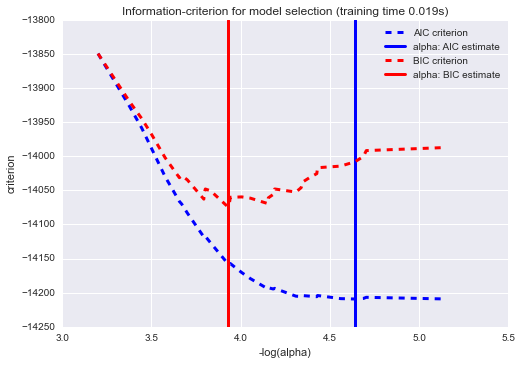

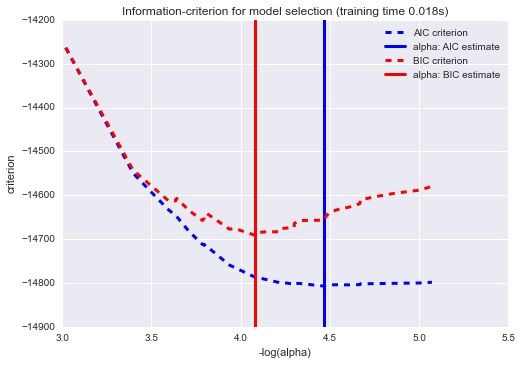

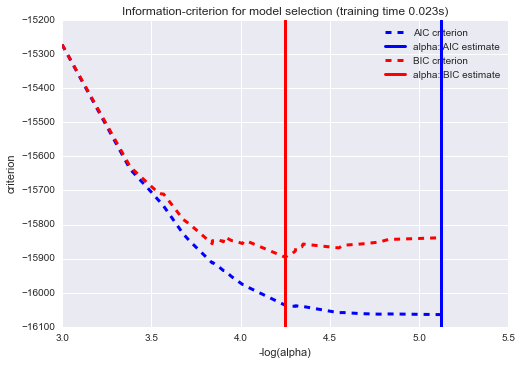

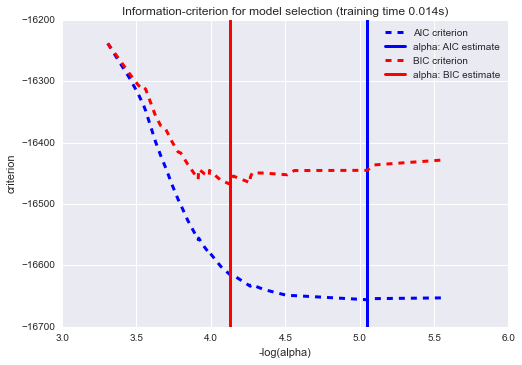

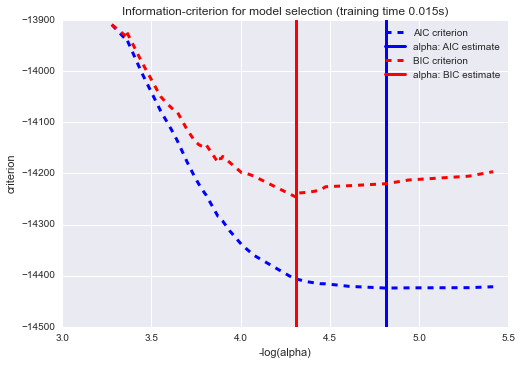

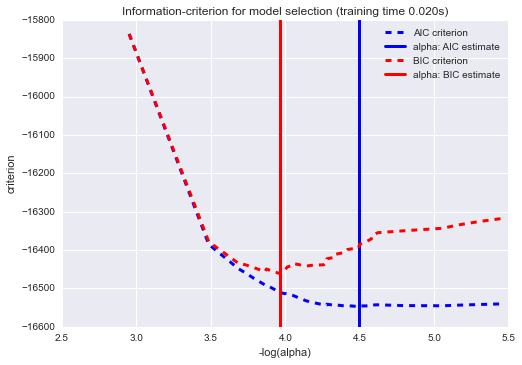

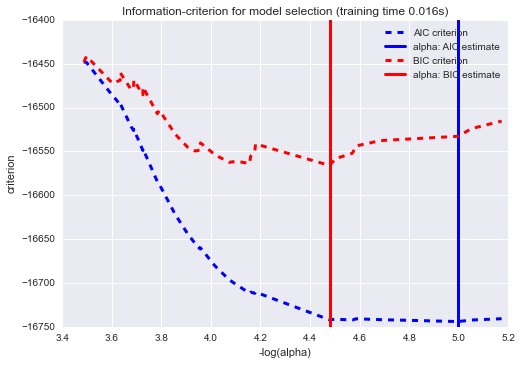

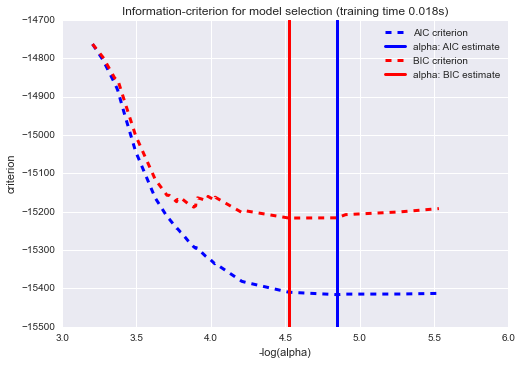

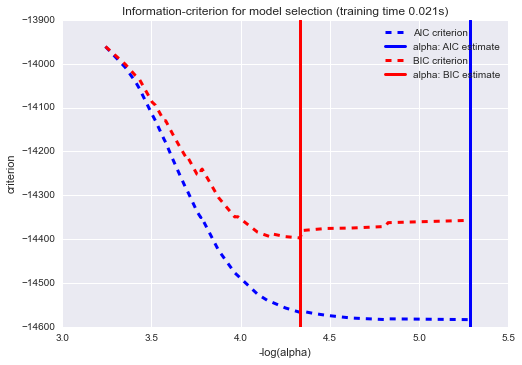

In [44]:
for X, y in o_clf.data:
    model_bic = d
    t1 = time.time()
    model_bic.fit(X, y)
    t_bic = time.time() - t1
    alpha_bic_ = model_bic.alpha_

    model_aic = LassoLarsIC(criterion='aic')
    model_aic.fit(X, y)
    alpha_aic_ = model_aic.alpha_
    plt.figure()
    plot_ic_criterion(model_aic, 'AIC', 'b')
    plot_ic_criterion(model_bic, 'BIC', 'r')
    plt.legend()
    plt.title('Information-criterion for model selection (training time %.3fs)'
              % t_bic)


In [34]:
import itertools

In [49]:
len(list(itertools.combinations(range(0, 31), 7)))

2629575

## Do this across regions

In [15]:
results_bic = []
alphas_bic = []
results_aic = []
alphas_aic = []
results_lassolars = []
alphas_lassolars = []
for X, y in o_clf.data:
    model_bic = LassoLarsIC(criterion='bic')
    model_bic.fit(X, y)
    results_bic.append(np.nonzero(model_bic.coef_)[0].shape[0])
    alphas_bic.append(1/model_bic.alpha_)
    model_aic = LassoLarsIC(criterion='aic')
    model_aic.fit(X, y)
    results_aic.append(np.nonzero(model_aic.coef_)[0].shape[0])
    alphas_aic.append(1/model_aic.alpha_)
    
    model = LassoLarsCV(cv=10).fit(X, y)
    
    results_lassolars.append(np.nonzero(model.coef_)[0].shape[0])
    alphas_lassolars.append(1/model.alpha_)


In [16]:
tools.make_mask_map(results_bic, o_clf.mask_img, 'test_lassobic_n')
tools.make_mask_map(alphas_bic, o_clf.mask_img, 'test_lassobic_alphas')
tools.make_mask_map(results_aic, o_clf.mask_img, 'test_lassoaic_n')
tools.make_mask_map(alphas_aic, o_clf.mask_img, 'test_lassoaic_alphas')

tools.make_mask_map(results_lassolars, o_clf.mask_img, 'test_lassolars_n')
tools.make_mask_map(alphas_lassolars, o_clf.mask_img, 'test_lassolars_alphas')

In [52]:
?LassoCV

## Lasso coordinate descent

Computing regularization path using the coordinate descent lasso...
Computing regularization path using the coordinate descent lasso...
Computing regularization path using the coordinate descent lasso...
Computing regularization path using the coordinate descent lasso...
Computing regularization path using the coordinate descent lasso...
Computing regularization path using the coordinate descent lasso...
Computing regularization path using the coordinate descent lasso...
Computing regularization path using the coordinate descent lasso...
Computing regularization path using the coordinate descent lasso...


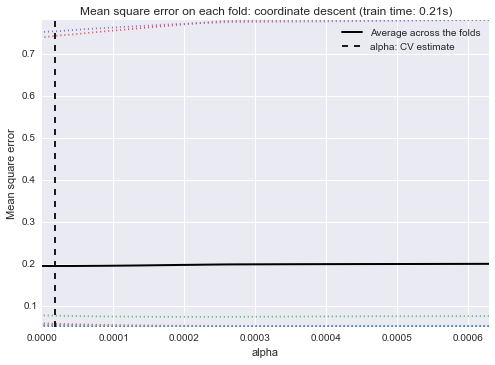

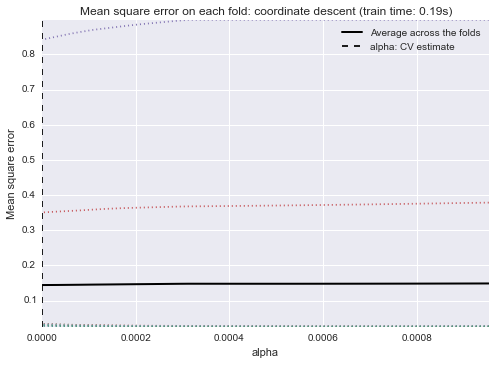

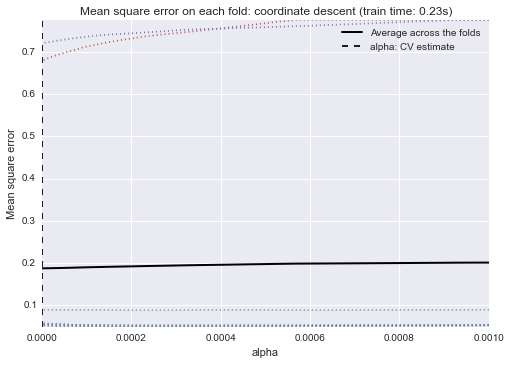

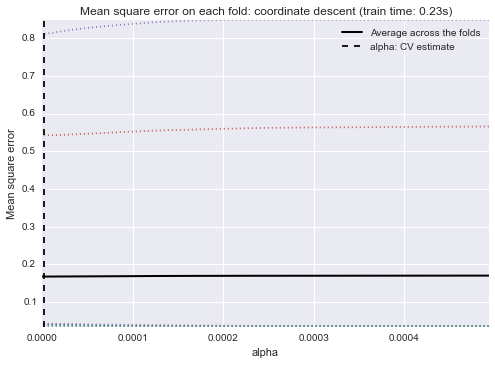

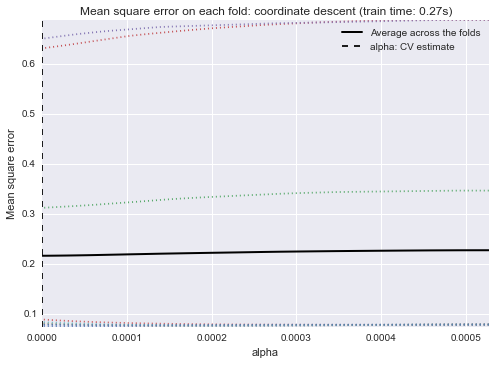

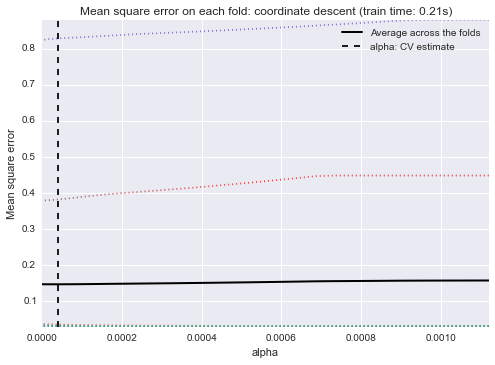

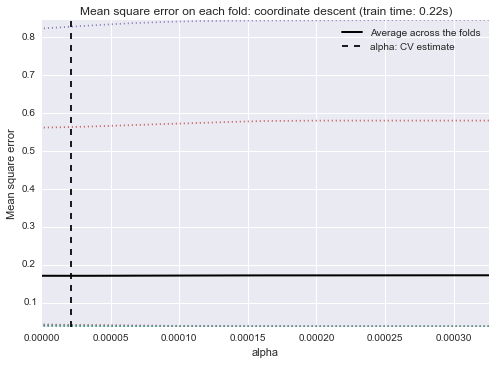

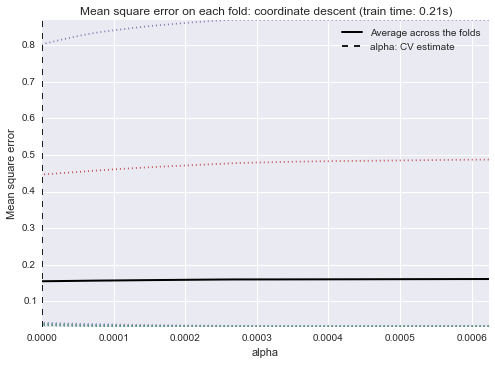

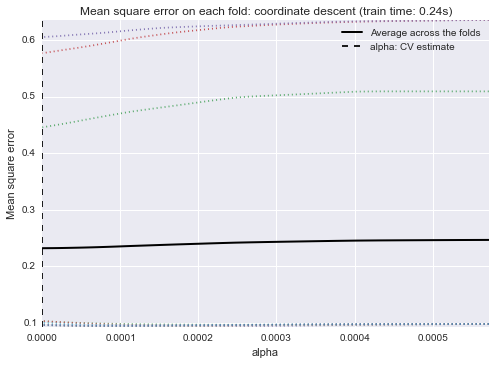

In [54]:
# Compute paths

for X, y in o_clf.data:

    print("Computing regularization path using the coordinate descent lasso...")
    t1 = time.time()
    model = LassoCV(cv=10, normalize=True).fit(X, y)
    t_lasso_cv = time.time() - t1

    # Display results
    m_log_alphas = model.alphas_

    plt.figure()
    ymin, ymax = 0, 1
    plt.plot(m_log_alphas, model.mse_path_, ':')
    plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
             label='Average across the folds', linewidth=2)
    plt.axvline(model.alpha_, linestyle='--', color='k',
                label='alpha: CV estimate')

    plt.legend()

    plt.xlabel('alpha')
    plt.ylabel('Mean square error')
    plt.title('Mean square error on each fold: coordinate descent '
              '(train time: %.2fs)' % t_lasso_cv)
    plt.axis('tight')
# plt.ylim(ymin, ymax)

In [31]:
np.round(model.alphas_, 3).max()

0.052999999999999999

In [14]:
model.coef_

array([-0.00394848,  0.00807975,  0.00067922, -0.00298319,  0.05045163,
        0.0244837 ,  0.00606159,  0.01702755,  0.00666294,  0.02842633,
        0.01061189,  0.00493731,  0.02042931,  0.03221542,  0.00350099,
        0.00296927,  0.03545753,  0.03690179,  0.04413683,  0.01440338,
        0.01960968,  0.02886631,  0.03184342,  0.02107801,  0.02250991,
        0.0195943 , -0.00249329,  0.06338422, -0.0084852 ,  0.03911359,
        0.00241411,  0.01326993, -0.00327288])

## LassoLarsCV

Computing regularization path using the Lars lasso...


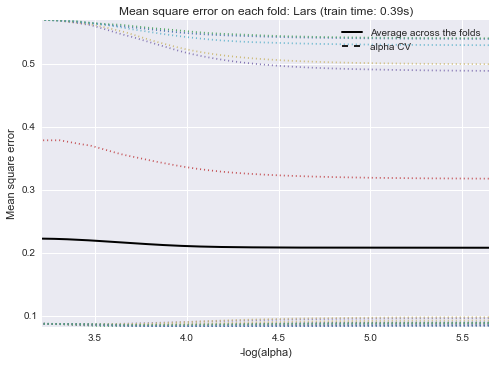

In [8]:
# Compute paths
print("Computing regularization path using the Lars lasso...")
t1 = time.time()
model = LassoLarsCV(cv=20).fit(X, y)
t_lasso_lars_cv = time.time() - t1

# Display results
m_log_alphas = -np.log10(model.cv_alphas_)

plt.figure()
plt.plot(m_log_alphas, model.cv_mse_path_, ':')
plt.plot(m_log_alphas, model.cv_mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: Lars (train time: %.2fs)'
          % t_lasso_lars_cv)
plt.axis('tight')
# plt.ylim(ymin, ymax)

plt.show()


In [12]:
-np.log10(model.cv_alphas_)

array([        inf,  5.64427705,  5.47560266,  5.44304398,  5.35030949,
        5.34517077,  5.33058602,  5.31034178,  5.28915353,  5.27149105,
        5.27072882,  5.2694668 ,  5.22974709,  5.17000842,  5.12452387,
        5.12401174,  5.12059563,  5.06413879,  5.06011433,  5.04977011,
        5.02869319,  5.0249573 ,  4.97758485,  4.97404424,  4.96183122,
        4.952206  ,  4.93652647,  4.92300483,  4.91675592,  4.91506718,
        4.90422073,  4.86507795,  4.86277278,  4.85582615,  4.85415585,
        4.85055594,  4.83069548,  4.82706318,  4.8239067 ,  4.81491377,
        4.80738966,  4.80417138,  4.79485342,  4.79439435,  4.79134748,
        4.78452358,  4.77978775,  4.76085686,  4.74240805,  4.74206015,
        4.73725178,  4.73279826,  4.73245235,  4.73135839,  4.72452722,
        4.72196634,  4.7126445 ,  4.71238393,  4.70893867,  4.70631991,
        4.70596279,  4.68283669,  4.67142639,  4.65836543,  4.65828284,
        4.65313088,  4.6436258 ,  4.6333616 ,  4.63315897,  4.63